In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [127]:
df = pd.read_csv('air-traffic-landings-statistics-1.csv')


In [128]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,201809,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,-,30,1410000
1,201809,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,-,125,17787978
2,201809,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,-,30,16620000
3,201809,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,-,3,491700
4,201809,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,-,16,7301712


In [129]:
df['Activity Period'] = df['Activity Period'].astype(str)

In [130]:
df['Month'] = df['Activity Period'].str[4:6]
df['Year'] = df['Activity Period'].str[0:4]
df = df.drop(columns='Activity Period')

## Amounts of flights landed from 2005 to 2018 by airline

In [131]:
air_land = df.groupby('Operating Airline')['Landing Count'].sum()

In [232]:
def bar_plot(n):
    top_air = air_land.nlargest(n)
    plt.title(f'Top {n} airlines at San Francisco airport from 2005 to 2018')
    return top_air.plot.barh(grid=True,alpha=0.7)

<AxesSubplot:title={'center':'Top 10 airlines at San Francisco airport from 2005 to 2018'}, ylabel='Operating Airline'>

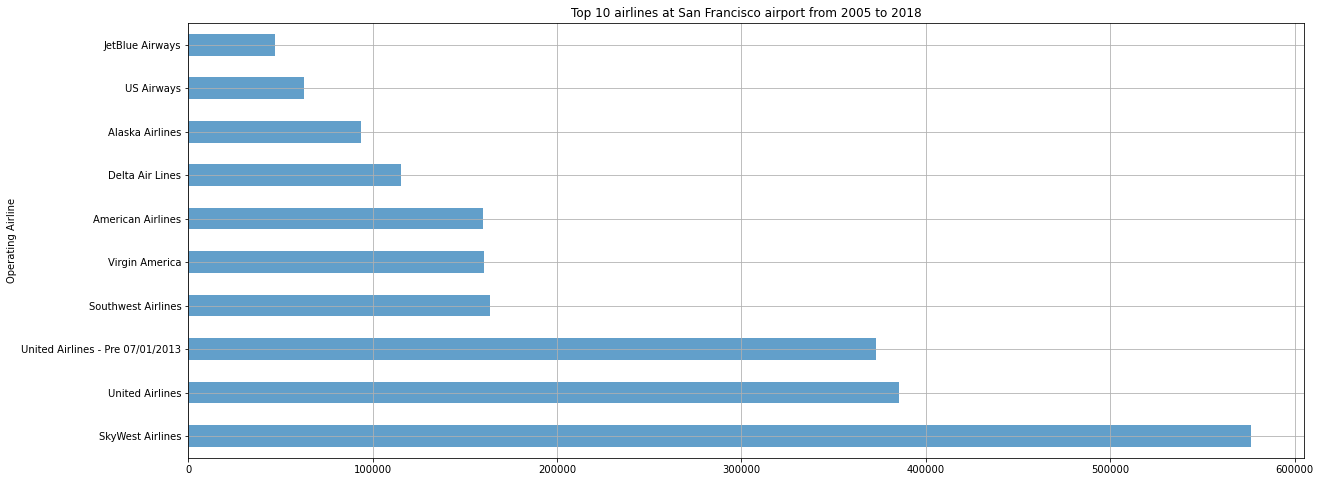

In [234]:
plt.figure(figsize=(20,8))
bar_plot(10)

## Performance of each of these airlines per year

#### Convert to int the month and year column

In [134]:
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [235]:
def airline_plot(n):
    MONTH =[]
    YEAR = []
    data = []
    plots = []
    PLOTDATA = []
    list_top = air_land.nlargest(n).index
    
    for airline in list_top:
        for year in range(2005,2019):
            YEAR.append(year)
            for month in range(1,13):
                MONTH.append(month)
                data = df.loc[(df['Operating Airline']==airline) & (df['Month']==month)  & (df['Year']==year)]
                PLOTDATA.append(data['Landing Count'].sum())
        
        plt.figure(figsize=(20,8))
        plt.plot(PLOTDATA,linewidth=3,color='green')
        plt.title(f'{airline} from 2005 to 2018')
        plt.ylabel('Landing count')
        plt.xlabel('Year')
        
        # Save the graph as .png
        
        for i in range(1,175,12):
            plt.axvline(x=i, color='blue',linewidth=1, alpha = 0.7,linestyle='-.')
        
        try:
            plt.savefig(f'{airline}.png')
        except:
            print(f'An error occurred when trying to save {airline} --> NAME INVALID')
        
        
        
        MONTH.clear()
        YEAR.clear()    
        PLOTDATA.clear()
    print(f'Plots of the top {n} airlines at San Franciso Airport from 2005 to 2018')
    plt.show() 

An error occurred when trying to save United Airlines - Pre 07/01/2013 --> NAME INVALID
Plots of the top 5 airlines at San Franciso Airport from 2005 to 2018


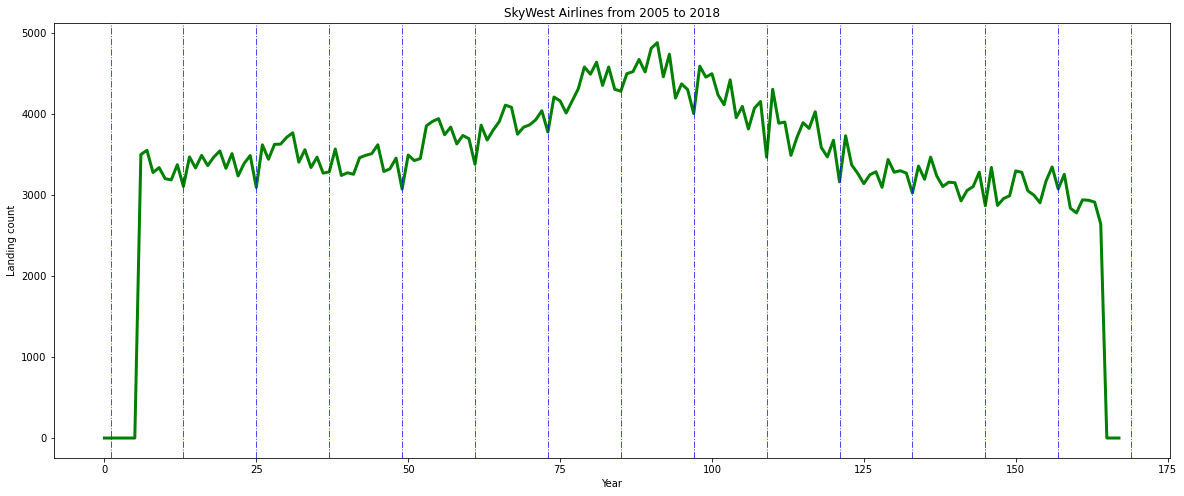

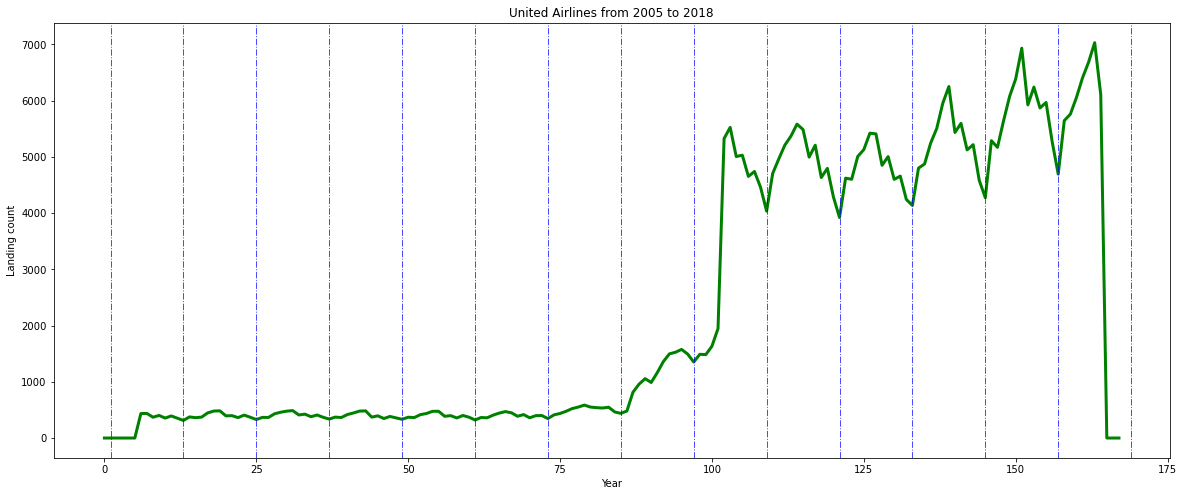

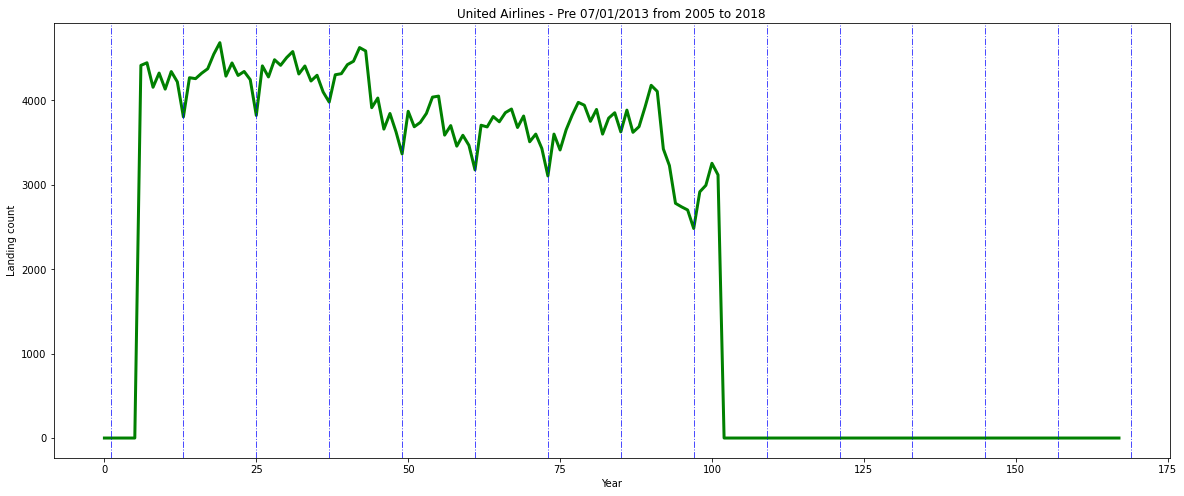

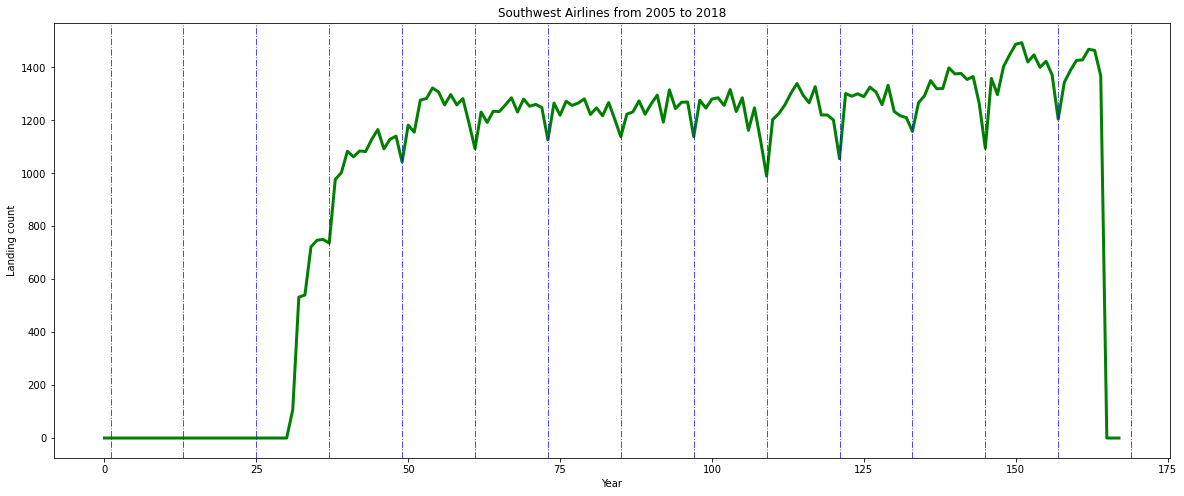

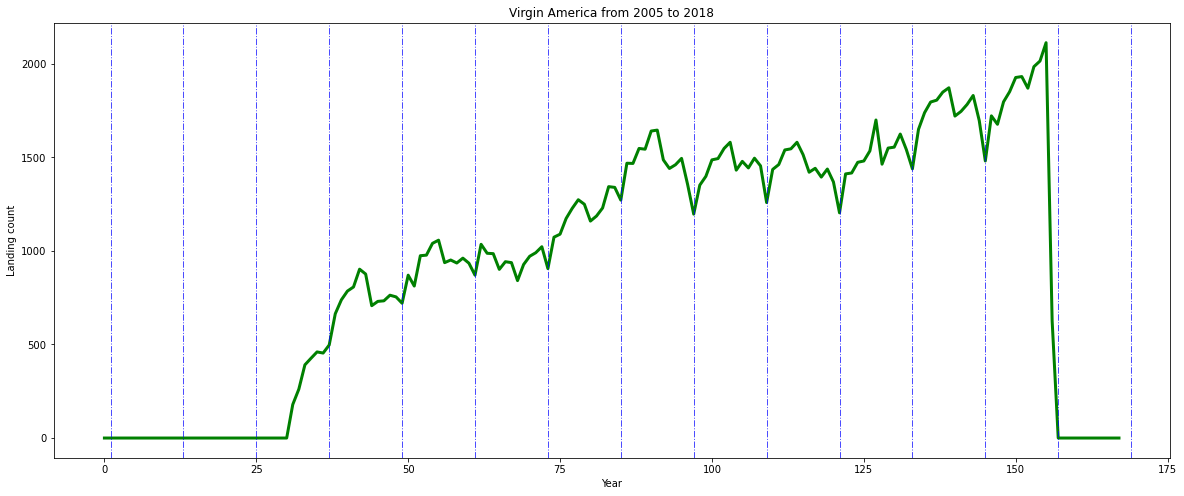

In [236]:
airline_plot(5)

In [ ]:
a = df.loc[df['Operating Airline']=='SkyWest Airlines']
a.loc[(a['Year']==2005) & (a['Month']==8)].sum()

In [137]:
df.loc[(df['Operating Airline']=='SkyWest Airlines') & (df['Month']==5) & (df['Year']==2006)]

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Month,Year
20664,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CL600,NaN,845,39715000,5,2006
20666,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,500,77,3619000,5,2006
20667,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,600,489,32763000,5,2006
20668,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ,600,101,6767000,5,2006
20671,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Turbo Prop,Embraer,ERJ,120,1977,51006600,5,2006


In [138]:
data

NameError: name 'data' is not defined

In [139]:
ok = df.loc[(df['Operating Airline']=='SkyWest Airlines') & (df['Month']==9)  & (df['Year']==2015)]

In [21]:
ok

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Month,Year
5665,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Embraer,ERJ,175,84,6296388,9,2015
5666,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Passenger,Regional Jet,Embraer,ERJ,175,684,51270588,9,2015
5667,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,900,43,3229300,9,2015
5668,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,700,3,201000,9,2015
5669,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ,600,41,2747000,9,2015
5670,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,600,588,39396000,9,2015
5671,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CL600,2B19,31,1457000,9,2015
5672,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CL600,2B19,1620,76140000,9,2015


In [23]:
ok['Landing Count'].sum()

3094

In [16]:
numpy.random.rand(1, 3)

array([[0.32838168, 0.35026982, 0.40981578]])

In [15]:
print(plots)

None
